# Australian Housing Market Assignment

#### Aim:
To identify the high impact variables which influence the house prices so that strategy can framed for high profitability which will inturn help in understanding dynamics of the market.

## Reading the Data

In [6441]:
#libraries Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import chardet
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

In [6442]:
#Detecting the encoding type
with open("train.csv", 'rb') as rawdata:
    enconding_type = chardet.detect(rawdata.read(1000))['encoding']
    print("train.csv encoding type is" ,enconding_type)

train.csv encoding type is ascii


But when i used encoding type ascii for import ,data was not being imported properly. So, proceeding ahead with deafult import.

In [6443]:
df_house_prices = pd.read_csv("train.csv")
df_house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6444]:
#Information regarding the dataframe
df_house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6445]:
#Shape of the dataframe
df_house_prices.shape

(1460, 81)

In [6446]:
#describe the dataframe
df_house_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning and Data Understanding

In [6447]:
#Definig a function to check the null values in house prices data frame and return the missing values percentage of columns
#which have atlease 1 missing value
def house_price_null_percentge(df):
    missing = round((df.isnull().sum()/len(df.index))*100,2)
    missing = missing[missing > 0]
    return missing

In [6448]:
#Defining a function for mode imputation as there are many categorical variables
def mod_impute(df_col):
    df_col.fillna(df_col.value_counts().index[0], inplace=True)

In [6449]:
#Defining custom count plot function for data analysis
def mycountplot(col,title="",xlabel="",ylabel=""):
    plt.figure(figsize=(15,5))
    ax=sns.countplot(df_house_prices[col])
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    plt.grid(color='gray', linestyle='dashed')
    plt.title(title,fontsize=28).set_position([.5, 1.05])
    return ax

In [6450]:
#Defining custom box plot function for data analysis
def myboxplot(col,title,xlabel,ylabel):
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(x=col, y=df_house_prices['loan_status'], data=df_master_loan)
    plt.title(title,fontsize=28).set_position([.5, 1.05])
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    plt.grid(color='gray', linestyle='dashed')
    return ax

In [6451]:
#Percentage Share
def percent_share(col,val):
      return round((len(df_house_prices[df_house_prices[col] == val])/len(df_house_prices.index))*100,2)

In [6452]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

We try to understand the columns with high null value perecentage

Inspecting PoolQC column

PoolQC         99.52 - Missing value percentage

As per data dictionary 

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [6453]:
df_house_prices.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

We can see from the above data that NA No Pool has not even a single value. We think that during data capture instead of NA, null value was populated which means 99.52% of the data belongs to NA. Here we have two choices either to impute the value NA for all the null columns or drop the column. We will be dropping the column as with such less useful data the probability of PoolQC being a strong influencer of our target variable are very low.

In [6454]:
columns_tobe_dropped = set()
columns_tobe_dropped.add("PoolQC")

In [6455]:
#Inspecting MiscFeature column
df_house_prices.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

MiscFeature    96.30 - Missing value percentage

As per data dictionary

MiscFeature: Miscellaneous feature not covered in other categories

       Elev-Elevator
       Gar2-2nd Garage (if not described in garage section)
       Othr-Other
       Shed-Shed (over 100 SF)
       TenC-Tennis Court
       NA-None
We will be dropping this column

In [6456]:
columns_tobe_dropped.add("MiscFeature")

In [6457]:
#Inspecting Alley column
df_house_prices.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Alley          93.77 - Missing value percentage<br>
As per data dictionary
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
We will be dropping this column

In [6458]:
columns_tobe_dropped.add("Alley")

In [6459]:
#Inspecting Fence column
df_house_prices.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Fence          80.75 - Missing Value Percentage<br>
Fence: Fence quality
		
       GdPrv-Good Privacy
       MnPrv-Minimum Privacy
       GdWo-Good Wood
       MnWw-Minimum Wood/Wire
       NA-No Fence
       
       We will be dropping this column

In [6460]:
columns_tobe_dropped.add("Fence")

In [6461]:
#Inspecting FireplaceQu column
df_house_prices.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

FireplaceQu    47.26 - Missing value percentage<br>
FireplaceQu: Fireplace quality

       Ex-Excellent - Exceptional Masonry Fireplace
       Gd-Good - Masonry Fireplace in main level
       TA-Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa-Fair - Prefabricated Fireplace in basement
       Po-Poor - Ben Franklin Stove
       NA-No Fireplace

       
       We will be dropping this column

In [6462]:
columns_tobe_dropped.add("FireplaceQu")

Dropping the columns which are determined to be dropped till now.

In [6463]:
df_house_prices = df_house_prices.drop(list(columns_tobe_dropped),axis=1)

In [6464]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

LotFrontage     17.74
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [6465]:
#Inspecting LotFrontage column
df_house_prices.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [6466]:
df_house_prices.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Mean 70.05<br>
Median 69.00

Mean and Median are close

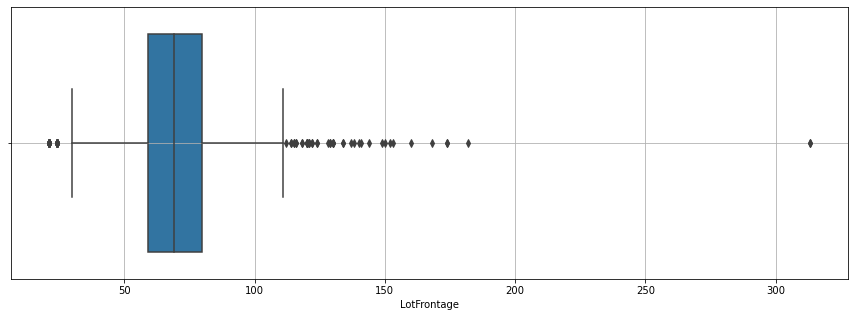

In [6467]:
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x = 'LotFrontage', data = df_house_prices)
ax.grid(True)
plt.show()

Clearly there are outliers , We are going to get rid of them. We will keep only -3sigma to +3 sigma for our analysis. 

In [6468]:
df_house_prices = df_house_prices[
    np.abs(df_house_prices.LotFrontage-df_house_prices.LotFrontage.mean()) <= (3*df_house_prices.LotFrontage.std())]
df_house_prices.shape

(1189, 76)

In [6469]:
#Imputing median value in the place of null values of df_house_prices.LotFrontage
df_house_prices.LotFrontage.fillna(df_house_prices.LotFrontage.median(),inplace=True)

In [6470]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

GarageCond      6.14
GarageQual      6.14
GarageFinish    6.14
GarageYrBlt     6.14
GarageType      6.14
BsmtFinType2    2.69
BsmtExposure    2.69
BsmtFinType1    2.61
BsmtCond        2.61
BsmtQual        2.61
MasVnrArea      0.50
MasVnrType      0.50
Electrical      0.08
dtype: float64

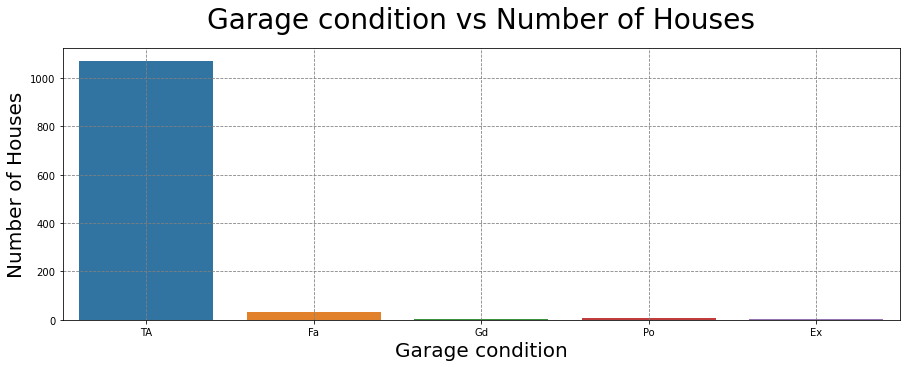

In [6471]:
#Inspecting GarageCond column
mycountplot("GarageCond","Garage condition vs Number of Houses","Garage condition","Number of Houses")
plt.show()

As per data dictionary
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

TA seems to have high value when compared to others. Let's see it's percentage share w.r.t to total.

In [6472]:
#Calculating percent share of TA
percent_share("GarageCond","TA")

90.08

From the above statistic we can understand that TA has almost 90% of the share. Such biased column won't add much value to our analysis so we will be dropping the column.

In [6473]:
#Checking the value counts for confirmation
df_house_prices.GarageCond.value_counts()

TA    1071
Fa      32
Po       6
Gd       5
Ex       2
Name: GarageCond, dtype: int64

In [6474]:
#Dropping the column
df_house_prices = df_house_prices.drop(["GarageCond"],axis=1)

In [6475]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

GarageQual      6.14
GarageFinish    6.14
GarageYrBlt     6.14
GarageType      6.14
BsmtFinType2    2.69
BsmtExposure    2.69
BsmtFinType1    2.61
BsmtCond        2.61
BsmtQual        2.61
MasVnrArea      0.50
MasVnrType      0.50
Electrical      0.08
dtype: float64

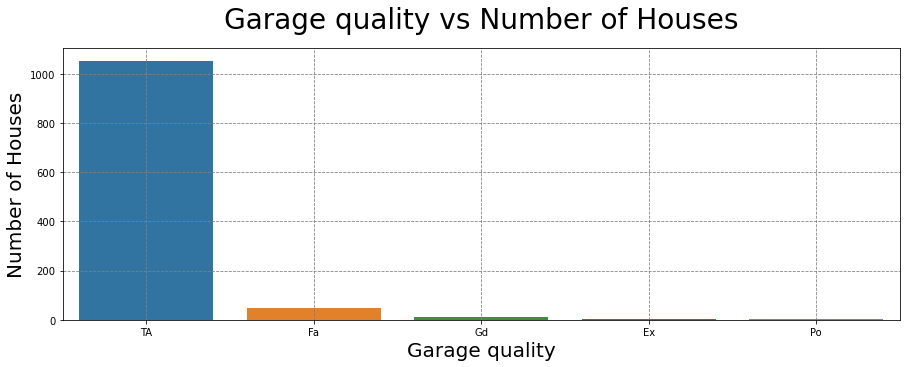

In [6476]:
#Inspecting GarageQual column
mycountplot("GarageQual","Garage quality vs Number of Houses","Garage quality","Number of Houses")
plt.show()

As per data dicitionary

GarageQual: Garage quality

       Ex-Excellent
       Gd-Good
       TA-Typical/Average
       Fa-Fair
       Po-Poor
       NA-No Garage
       
TA seems to have very have value count when compared to others. Inspecting it's perecentage share.

In [6477]:
percent_share("GarageQual","TA")

88.56

From the above statistic we can understand that TA has almost 89% of the share. Such biased column won't add much value to our analysis so we will be dropping the column.

In [6478]:
#Checking value counts for confirmation
df_house_prices.GarageQual.value_counts()

TA    1053
Fa      46
Gd      11
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [6479]:
#Dropping the column
df_house_prices = df_house_prices.drop(["GarageQual"],axis=1)

In [6480]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

GarageFinish    6.14
GarageYrBlt     6.14
GarageType      6.14
BsmtFinType2    2.69
BsmtExposure    2.69
BsmtFinType1    2.61
BsmtCond        2.61
BsmtQual        2.61
MasVnrArea      0.50
MasVnrType      0.50
Electrical      0.08
dtype: float64

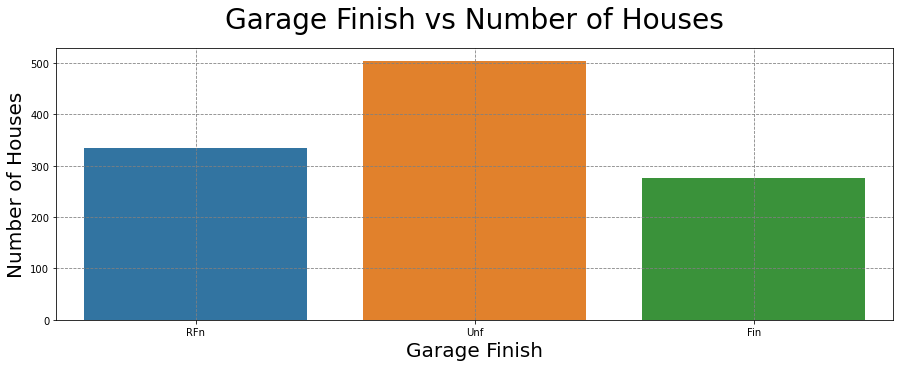

In [6481]:
#Inspecting GarageFinish
mycountplot("GarageFinish","Garage Finish vs Number of Houses","Garage Finish","Number of Houses")
plt.show()

As per data dictionary

GarageFinish: Interior finish of the garage

       Fin-Finished
       RFn-Rough Finished	
       Unf-Unfinished
       NA-No Garage
       
We can see that the difference is not that huge for mode value imputation due to which we will be filtering out the null value records.Imputation of mode in this case would lead bias towards the corresponding mode value.

In [6482]:
#Filtering out the records based on null values in GarageFinish column
df_house_prices = df_house_prices[~df_house_prices.GarageFinish.isnull()]
df_house_prices.shape

(1116, 74)

In [6483]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

BsmtFinType2    2.24
BsmtExposure    2.24
BsmtFinType1    2.15
BsmtCond        2.15
BsmtQual        2.15
MasVnrArea      0.54
MasVnrType      0.54
Electrical      0.09
dtype: float64

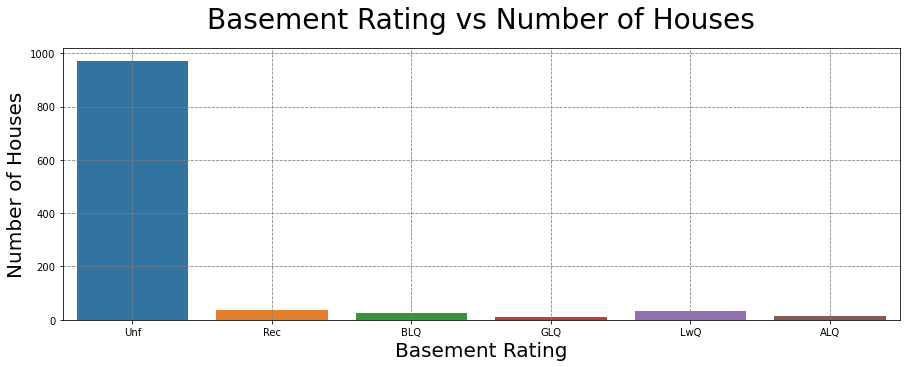

In [6484]:
#Inspecting BsmtFinType2 column
mycountplot("BsmtFinType2","Basement Rating vs Number of Houses","Basement Rating","Number of Houses")
plt.show()

As per data dicitionary

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

We can see that Unf has very high value count. Inspecting it's percentage share

In [6485]:
percent_share("BsmtFinType2","Unf")

87.01

From the above statistic we can understand that Unf has almost 87% of the share. Such biased column won't add much value to our analysis so we will be dropping the column.

In [6486]:
#Checking value counts for confirmation
df_house_prices.BsmtFinType2.value_counts()

Unf    971
Rec     36
LwQ     34
BLQ     25
ALQ     13
GLQ     12
Name: BsmtFinType2, dtype: int64

In [6487]:
#Dropping the column
df_house_prices = df_house_prices.drop(["BsmtFinType2"],axis=1)

In [6488]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

BsmtExposure    2.24
BsmtFinType1    2.15
BsmtCond        2.15
BsmtQual        2.15
MasVnrArea      0.54
MasVnrType      0.54
Electrical      0.09
dtype: float64

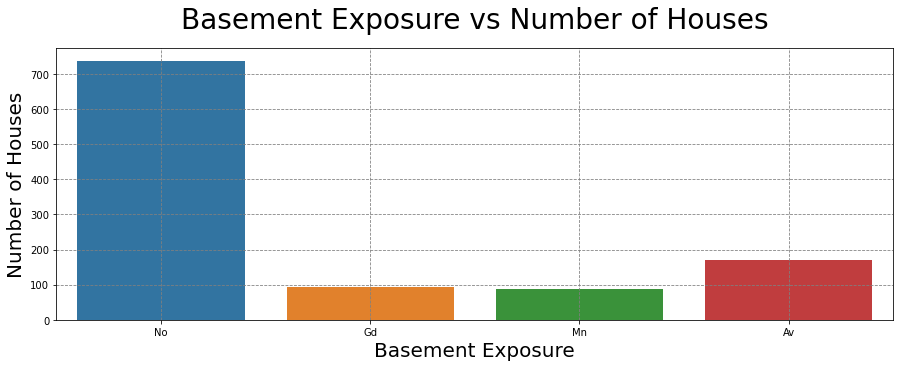

In [6489]:
#Inspecting BsmtExposure column
mycountplot("BsmtExposure","Basement Exposure vs Number of Houses","Basement Exposure","Number of Houses")
plt.show()

As per data dictionary
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
No seems to have high value count. Insepecting it's percent share.

In [6490]:
percent_share("BsmtExposure","No")

66.04

We will be going ahead with mode level imputation as No has a percentage share of almost 66%.

In [6491]:
#Performing mode imputation
mod_impute(df_house_prices.BsmtExposure)

In [6492]:
df_house_prices.BsmtExposure.value_counts()

No    762
Av    171
Gd     94
Mn     89
Name: BsmtExposure, dtype: int64

In [6493]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

BsmtFinType1    2.15
BsmtCond        2.15
BsmtQual        2.15
MasVnrArea      0.54
MasVnrType      0.54
Electrical      0.09
dtype: float64

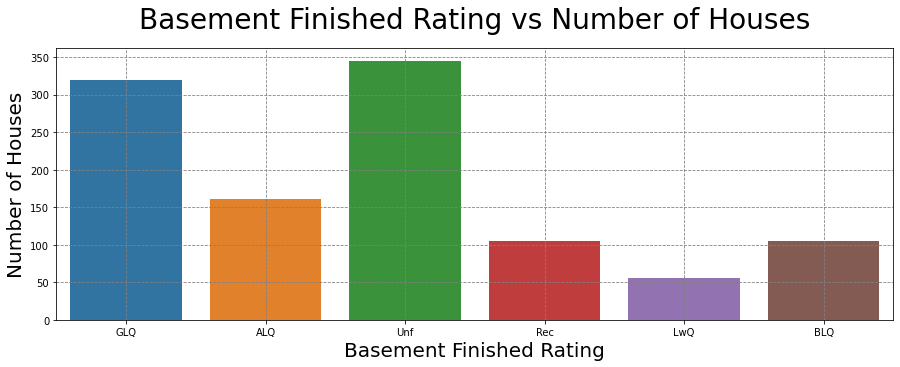

In [6494]:
#Inspecting BsmtFinType1 column
mycountplot("BsmtFinType1","Basement Finished Rating vs Number of Houses","Basement Finished Rating","Number of Houses")
plt.show()

As per data dictionary
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
We will be filtering out the null value records.

In [6495]:
#Filtering out the records based on null values in BsmtFinType1 column
df_house_prices = df_house_prices[~df_house_prices.BsmtFinType1.isnull()]
df_house_prices.shape

(1092, 73)

In [6496]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

MasVnrArea    0.55
MasVnrType    0.55
Electrical    0.09
dtype: float64

In [6497]:
#Inspecting MasVnrArea column
df_house_prices.MasVnrArea.value_counts()

0.0       630
108.0       7
16.0        7
72.0        6
80.0        6
         ... 
286.0       1
921.0       1
1047.0      1
975.0       1
258.0       1
Name: MasVnrArea, Length: 278, dtype: int64

As per data dictionary
MasVnrArea: Masonry veneer area in square feet

In [6498]:
df_house_prices.MasVnrArea.describe()

count    1086.000000
mean      109.871087
std       189.703999
min         0.000000
25%         0.000000
50%         0.000000
75%       172.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

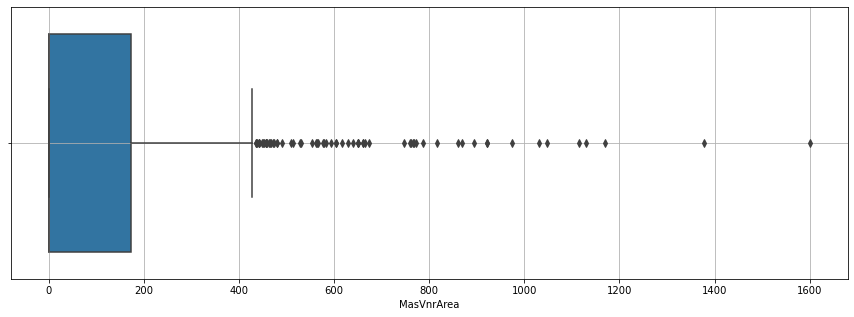

In [6499]:
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x = 'MasVnrArea', data = df_house_prices)
ax.grid(True)
plt.show()

Clearly, there are some outliers. We are going to get rid of them. We will keep only -3sigma to +3 sigma for our analysis.

In [6500]:
df_house_prices = df_house_prices[
    np.abs(df_house_prices.MasVnrArea-df_house_prices.MasVnrArea.mean()) <= (3*df_house_prices.MasVnrArea.std())]
df_house_prices.shape

(1065, 73)

In [6501]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

Electrical    0.09
dtype: float64

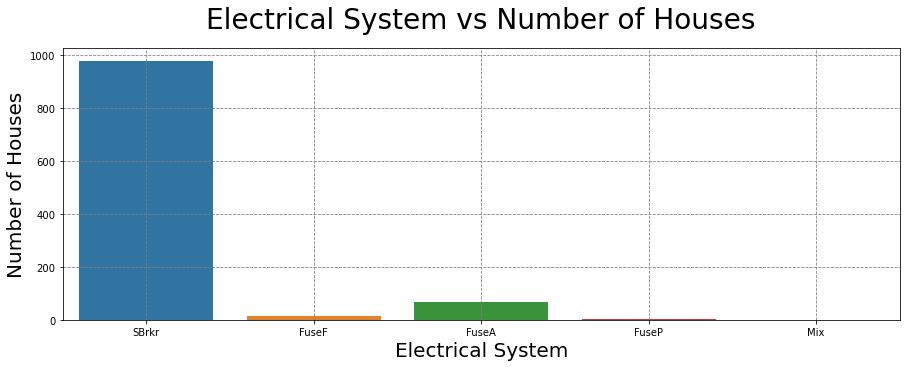

In [6502]:
#Inspecting column Electrical    
mycountplot("Electrical","Electrical System vs Number of Houses","Electrical System","Number of Houses")
plt.show()

As per data dictionary
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

SBrkr seems to have high value count. Inspecting it's percentage share.

In [6503]:
percent_share("Electrical","SBrkr")

91.92

From the above statistic we can understand that SBrkr has almost 92% of the share. Such biased column won't add much value to our analysis so we will be dropping the column.

In [6504]:
#Checking value counts for confirmation
df_house_prices.Electrical.value_counts()

SBrkr    979
FuseA     67
FuseF     15
FuseP      2
Mix        1
Name: Electrical, dtype: int64

In [6505]:
#dropping the columns
df_house_prices = df_house_prices.drop("Electrical",axis=1)

In [6506]:
#Inspecting null value percentages in the data frame
house_price_null_percentge(df_house_prices).sort_values(ascending=False)

Series([], dtype: float64)

In [6507]:
#Creating a derived metric
df_house_prices["Age"] = df_house_prices.YrSold - df_house_prices.YearBuilt
df_house_prices.Age.value_counts()

1      90
0      55
2      38
3      31
4      31
       ..
107     1
103     1
79      1
104     1
129     1
Name: Age, Length: 119, dtype: int64

In [6508]:
#dropping the columns
df_house_prices = df_house_prices.drop(["YrSold","YearBuilt"],axis=1)

In [6509]:
# Checking if there are any duplicate values in the dataset
df_house_prices[df_house_prices.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age


There are no dulicate entries in the data set

In [6510]:
df_house_prices.shape

(1065, 71)

## Data visualization

In [6511]:
house_prices_numeric = df_house_prices.select_dtypes(include=['float64','int64'])
house_prices_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,208500,5
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,181500,31
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,223500,7
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,140000,91
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,250000,8


In [6512]:
house_prices_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age'],
      dtype='object')

Even though the below columns are numeric they need to be treated as categorical variables

MSSubClass<br>
OverallQual<br>
OverallCond<br>
MoSold<br>

And we don't need Id as it doesn't have any impact.

In [6513]:
house_prices_numeric = house_prices_numeric.drop(['MSSubClass','OverallQual','OverallCond',
                                                  'MoSold','Id']
                                                 , axis=1)
house_prices_numeric.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
0,65.0,8450,2003,196.0,706,0,150,856,856,854,...,548,0,61,0,0,0,0,0,208500,5
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,...,460,298,0,0,0,0,0,0,181500,31
2,68.0,11250,2002,162.0,486,0,434,920,920,866,...,608,0,42,0,0,0,0,0,223500,7
3,60.0,9550,1970,0.0,216,0,540,756,961,756,...,642,0,35,272,0,0,0,0,140000,91
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,...,836,192,84,0,0,0,0,0,250000,8


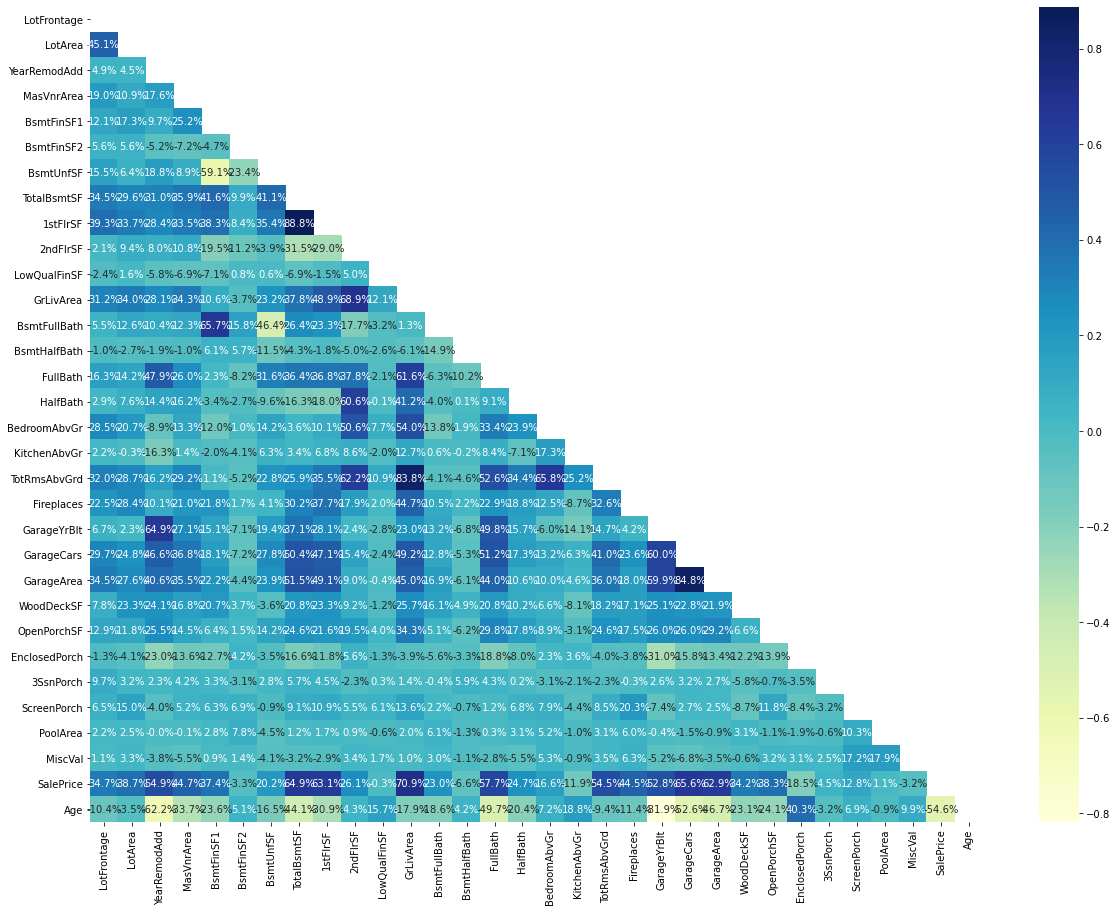

In [6514]:
#Plotting a heat map for visualization of multiple relations
plt.figure(figsize = (20,15))
mask_ut=np.triu(np.ones(house_prices_numeric.corr(method='spearman').shape)).astype(np.bool)
sns.heatmap(house_prices_numeric.corr(),mask=mask_ut, annot = True, cmap="YlGnBu",fmt='.1%')
plt.show()

From the above heat map we can see that there are many variables which are correlated 

1. GrLiArea and TotRmsAbvGrd have  postive co-relation of 83.8%.
2. Garage Cars and Garage area have postive co-relation of 84.8%.
3. BsmtFullBath and BsmtFinSF1 have postive co-relation of 65.7%.
4. BsmtUnfSF and BsmtFinSF1 have negative co-relation of 59.1%.
e.t.c 
Such correlations can be observed from heat map.

In [6515]:
#Dropping the Target variable to use the numeric columns in the future
house_prices_numeric = house_prices_numeric.drop("SalePrice",axis=1)

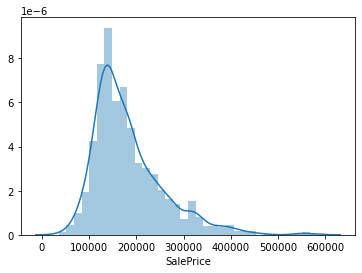

In [6516]:
# Checking the spread of target variable 
sns.distplot(df_house_prices.SalePrice)
plt.show()

## Mapping for Dummy variable creation

After understanding the data dictionary we have found some columns which need to be mapped to their corresponding catgorical values.

In [6517]:
#Inspecting column MSSubClass
df_house_prices.MSSubClass.value_counts()

20     404
60     211
50     113
120     65
160     51
70      51
30      47
80      37
90      24
190     19
85      13
75      12
45       9
180      6
40       3
Name: MSSubClass, dtype: int64

In [6518]:
#mapping MSSubClass
df_house_prices.MSSubClass = df_house_prices.MSSubClass.map({
                                                                20:"1-STORY 1946 & NEWER ALL STYLES",
                                                                30:"1-STORY 1945 & OLDER",
                                                                40:"1-STORY W/FINISHED ATTIC ALL AGES",
                                                                45:"1-1/2 STORY - UNFINISHED ALL AGES",
                                                                50:"1-1/2 STORY FINISHED ALL AGES",
                                                                60:"2-STORY 1946 & NEWER",
                                                                70:"2-STORY 1945 & OLDER",
                                                                75:"2-1/2 STORY ALL AGES",
                                                                80:"SPLIT OR MULTI-LEVEL",
                                                                85:"SPLIT FOYER",
                                                                90:"DUPLEX - ALL STYLES AND AGES",
                                                                120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
                                                                150:"1-1/2 STORY PUD - ALL AGES",
                                                                160:"2-STORY PUD - 1946 & NEWER",
                                                                180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                                                                190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"
                     
                                                            })

In [6519]:
df_house_prices.MSSubClass.value_counts()

1-STORY 1946 & NEWER ALL STYLES                          404
2-STORY 1946 & NEWER                                     211
1-1/2 STORY FINISHED ALL AGES                            113
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     65
2-STORY 1945 & OLDER                                      51
2-STORY PUD - 1946 & NEWER                                51
1-STORY 1945 & OLDER                                      47
SPLIT OR MULTI-LEVEL                                      37
DUPLEX - ALL STYLES AND AGES                              24
2 FAMILY CONVERSION - ALL STYLES AND AGES                 19
SPLIT FOYER                                               13
2-1/2 STORY ALL AGES                                      12
1-1/2 STORY - UNFINISHED ALL AGES                          9
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                    6
1-STORY W/FINISHED ATTIC ALL AGES                          3
Name: MSSubClass, dtype: int64

In [6520]:
#Inspecting column OverallQual
df_house_prices.OverallQual.value_counts()

5     291
6     267
7     253
8     134
4      66
9      36
10      8
3       8
2       2
Name: OverallQual, dtype: int64

In [6521]:
#Mapping OverallQual column
df_house_prices.OverallQual = df_house_prices.OverallQual.map({
                                           10:"Very Excellent",
                                           9:"Excellent",
                                           8:"Very Good",
                                           7:"Good",
                                           6:"Above Average",
                                           5:"Average",
                                           4:"Below Average",
                                           3:"Fair",
                                           2:"Poor",
                                           1:"Very Poor"
    
                                })

In [6522]:
df_house_prices.OverallQual.value_counts()

Average           291
Above Average     267
Good              253
Very Good         134
Below Average      66
Excellent          36
Very Excellent      8
Fair                8
Poor                2
Name: OverallQual, dtype: int64

In [6523]:
#Inspecting OverallCond column
df_house_prices.OverallCond.value_counts()

5    614
6    186
7    143
8     57
4     36
9     13
3     13
2      3
Name: OverallCond, dtype: int64

In [6524]:
#Mapping OverallCond column
df_house_prices.OverallCond = df_house_prices.OverallCond.map({
                                           10:"Very Excellent",
                                           9:"Excellent",
                                           8:"Very Good",
                                           7:"Good",
                                           6:"Above Average",
                                           5:"Average",
                                           4:"Below Average",
                                           3:"Fair",
                                           2:"Poor",
                                           1:"Very Poor"
    
                                })

In [6525]:
df_house_prices.OverallCond.value_counts()

Average          614
Above Average    186
Good             143
Very Good         57
Below Average     36
Fair              13
Excellent         13
Poor               3
Name: OverallCond, dtype: int64

In [6526]:
#Inspecting column MoSold
df_house_prices.MoSold.value_counts()

7     178
6     175
5     148
4     105
8      92
3      70
10     68
11     57
9      48
2      42
1      42
12     40
Name: MoSold, dtype: int64

In [6527]:
#Mapping MoSold
df_house_prices.MoSold = df_house_prices.MoSold.map({
                              1: 'Jan',
                              2: 'Feb',
                              3: 'Mar',
                              4: 'Apr',
                              5: 'May',
                              6: 'Jun',
                              7: 'Jul',
                              8: 'Aug',
                              9: 'Sep',
                              10:'Oct',
                              11:'Nov',
                              12:'Dec'
                             })

In [6528]:
df_house_prices.MoSold.value_counts()

Jul    178
Jun    175
May    148
Apr    105
Aug     92
Mar     70
Oct     68
Nov     57
Sep     48
Feb     42
Jan     42
Dec     40
Name: MoSold, dtype: int64

In [6529]:
#Id Column is not required
df_house_prices = df_house_prices.drop("Id",axis=1)

## Visualizing Categorical Variables

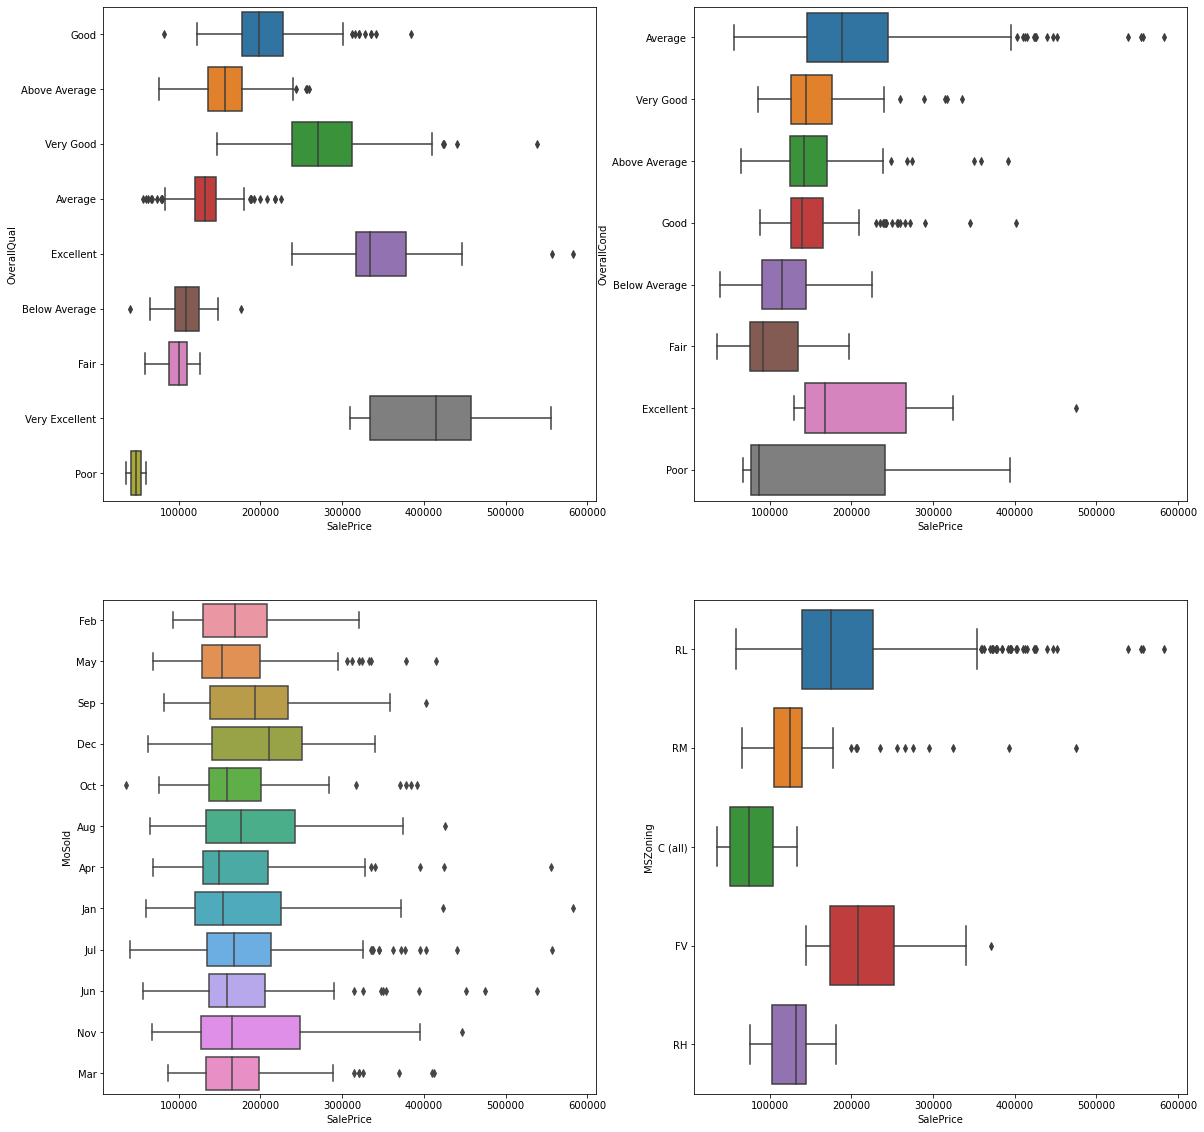

In [6530]:
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.boxplot(y = 'OverallQual', x = 'SalePrice', data = df_house_prices)
plt.subplot(2,3,2)
sns.boxplot(y = 'OverallCond', x = 'SalePrice', data = df_house_prices)
plt.subplot(2,3,4)
sns.boxplot(y = 'MoSold', x = 'SalePrice', data = df_house_prices)
plt.subplot(2,3,5)
sns.boxplot(y = 'MSZoning', x = 'SalePrice', data = df_house_prices)
plt.show()

Now we have finished mapping and proceed to the creation of dummy variables

## Data preparation

In [6531]:
# creating dummy variables for categorical variables
house_prices_categorical = df_house_prices.select_dtypes(include=['object'])
house_prices_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,HeatingQC,CentralAir,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,MoSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Ex,Y,Gd,Typ,Attchd,RFn,Y,Feb,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Ex,Y,TA,Typ,Attchd,RFn,Y,May,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Ex,Y,Gd,Typ,Attchd,RFn,Y,Sep,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Y,Gd,Typ,Detchd,Unf,Y,Feb,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Ex,Y,Gd,Typ,Attchd,RFn,Y,Dec,WD,Normal


In [6532]:
#Creating dummy variables
house_prices_dummies = pd.get_dummies(house_prices_categorical,drop_first=True)
house_prices_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [6533]:
#Dropping categorical columns
df_house_prices = df_house_prices.drop(list(house_prices_categorical.columns), axis=1)

In [6534]:
#Concatinating the dummy variables
df_house_prices = pd.concat([df_house_prices,house_prices_dummies],axis=1)

In [6535]:
df_house_prices.shape

(1065, 238)

In [6536]:
# split into train and test
df_train, df_test = train_test_split(df_house_prices, train_size = 0.7, test_size = 0.3, random_state = 100)

In [6537]:
#Splitting data into X and y
y_train = df_train.pop('SalePrice') #Target variable
X_train = df_train

In [6538]:
scaler = MinMaxScaler()
X_train[house_prices_numeric.columns] = scaler.fit_transform(X_train[house_prices_numeric.columns])

In [6539]:
print(X_train.shape,y_train.shape)

(745, 237) (745,)


In [6540]:
# Running RFE with the output number of the features equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [6541]:
col = X_train.columns[rfe.support_]
print("The top 20 features are ")
col.values

The top 20 features are 


array(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'Age',
       'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER', 'Condition2_RRNn',
       'HouseStyle_1.5Unf', 'OverallQual_Very Excellent',
       'RoofMatl_Membran', 'ExterCond_Fa', 'Foundation_Wood'],
      dtype=object)

## Model Building and Evaluation

In [6542]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

We will be performing manual VIF based elimination of features to remove multicollinearity from our model.

In [6543]:
#Defining a function which returns features which have VIF value > 5
def get_vif_greater_than_5(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif[vif['VIF'] > 5]

In [6544]:
get_vif_greater_than_5(X_train_rfe)

,Features,VIF
5,1stFlrSF,inf
6,2ndFlrSF,inf
7,LowQualFinSF,inf
8,GrLivArea,inf
4,TotalBsmtSF,4184.03
3,BsmtUnfSF,1816.21
1,BsmtFinSF1,1182.66
2,BsmtFinSF2,111.78


1stFlrSF has very high VIF value. We will be dropping it. We will check VIF again.

In [6545]:
X_train_rfe = X_train_rfe.drop(["1stFlrSF"],axis=1)
get_vif_greater_than_5(X_train_rfe)

,Features,VIF
4,TotalBsmtSF,4184.03
3,BsmtUnfSF,1816.21
1,BsmtFinSF1,1182.66
2,BsmtFinSF2,111.78
7,GrLivArea,11.37
5,2ndFlrSF,10.15


TotalBsmtSF has very high VIF value. We will be dropping it. We will check VIF again.

In [6546]:
X_train_rfe = X_train_rfe.drop(["TotalBsmtSF"],axis=1)
get_vif_greater_than_5(X_train_rfe)

,Features,VIF
6,GrLivArea,55.88
3,BsmtUnfSF,17.76
7,BedroomAbvGr,17.76
4,2ndFlrSF,13.94
1,BsmtFinSF1,11.87
0,LotArea,5.83


GrLivArea has very high VIF value. We will be dropping it. We will check VIF again.

In [6547]:
X_train_rfe = X_train_rfe.drop(["GrLivArea"],axis=1)
get_vif_greater_than_5(X_train_rfe)

,Features,VIF
6,BedroomAbvGr,17.68
0,LotArea,5.83
3,BsmtUnfSF,5.49


BedroomAbvGr has very high VIF value. We will be dropping it. We will check VIF again.

In [6548]:
X_train_rfe = X_train_rfe.drop(["BedroomAbvGr"],axis=1)
get_vif_greater_than_5(X_train_rfe)

,Features,VIF
0,LotArea,5.62


LotArea has VIF value > 5,So we will be dropping it.We will check VIF again.

In [6549]:
X_train_rfe = X_train_rfe.drop(["LotArea"],axis=1)
get_vif_greater_than_5(X_train_rfe)

,Features,VIF


Features which are multicollinear have been removed. Now , We will be proceeding for Ridge and Lasso Regression

## Ridge Regression

In [6550]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge() #Ridge Regression

# cross validation
folds = 5

ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
ridge_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [6551]:
ridge_model_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_model_cv_results = ridge_model_cv_results[ridge_model_cv_results['param_alpha']<=200]
ridge_model_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004588,0.000488,0.003011,0.000032,0.0001,{'alpha': 0.0001},-22823.359534,-24787.467770,-25922.229700,-24887.397030,...,-24519.522761,1016.749219,7,-24249.676932,-23660.196992,-23251.345824,-23411.890052,-24142.412418,-23743.104444,393.564659
1,0.003928,0.000642,0.002194,0.000399,0.001,{'alpha': 0.001},-22823.879234,-24788.407781,-25921.380363,-24886.807541,...,-24519.255726,1016.440003,6,-24249.466955,-23660.432407,-23251.367805,-23412.087176,-24142.437592,-23743.158387,393.467142
2,0.006873,0.002725,0.003771,0.001958,0.01,{'alpha': 0.01},-22829.070501,-24797.791035,-25912.907082,-24880.916831,...,-24517.135419,1013.198049,5,-24247.613341,-23662.771015,-23251.567943,-23414.042310,-24142.822418,-23743.763405,392.592663
3,0.009784,0.001126,0.004569,0.001010,0.05,{'alpha': 0.05},-22852.006637,-24839.123033,-25875.678951,-24854.835842,...,-24509.287642,998.963066,4,-24240.516196,-23674.205308,-23252.044514,-23424.071936,-24146.116717,-23747.390934,389.207955
4,0.006104,0.001146,0.003415,0.001191,0.1,{'alpha': 0.1},-22880.584100,-24889.935107,-25830.086751,-24822.496167,...,-24499.846323,982.584131,2,-24232.370686,-23691.772158,-23252.676957,-23438.019849,-24150.656928,-23753.099316,385.022526


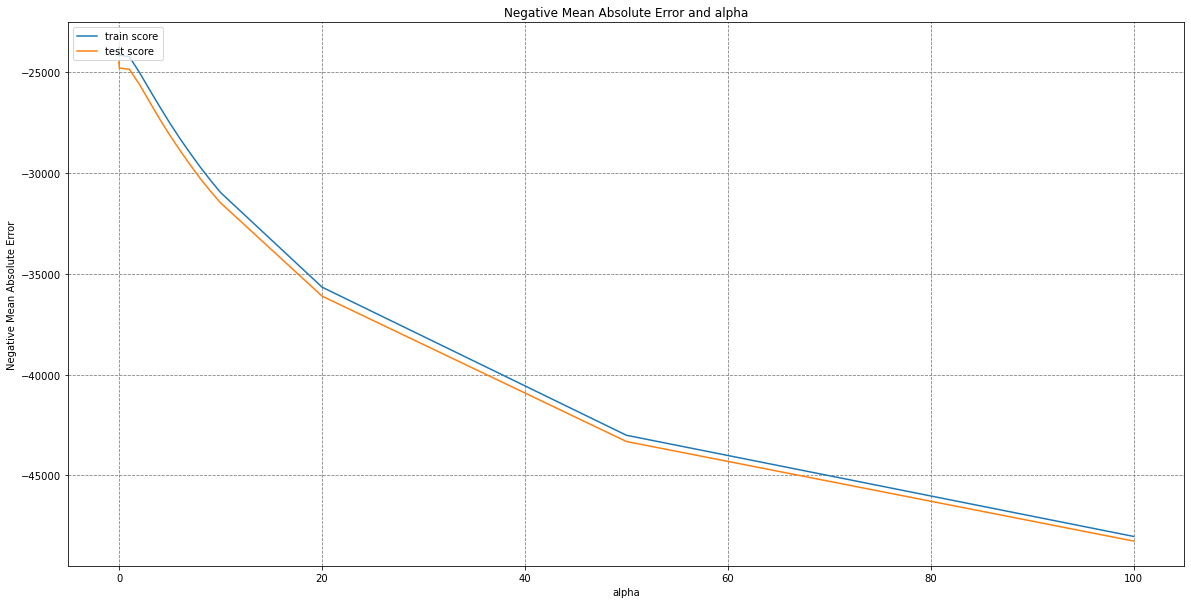

In [6552]:
# plotting mean test and train scoes with alpha 
ridge_model_cv_results['param_alpha'] = ridge_model_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20,10))
plt.grid(color='gray', linestyle='dashed')
plt.plot(ridge_model_cv_results['param_alpha'], ridge_model_cv_results['mean_train_score'])
plt.plot(ridge_model_cv_results['param_alpha'], ridge_model_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [6553]:
# getting the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=0.2)

As per ridge model 0.2 is the best alpha value. Using this to build our Ridge model.

In [6554]:
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 259825.28554609,  159128.97856509,  269049.84209447,
        154623.12353428,   62797.74329952, -109361.90127276,
        -88816.00280986,   27010.40380022,  -30809.06279347,
         26864.4098572 ,   29104.45090332,  103236.75472562,
         71131.69074384,  -38732.2966225 ,  -35858.24676526])

We have received the co-efficients. Now we will be mapping these co-efficients to the corressponding features to create a 
dataframe which can used further.

In [6555]:
ridge_pred_var = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(2)})
ridge_pred_var.reset_index(drop=True, inplace=True)
ridge_pred_var.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
2,BsmtUnfSF,269049.84
0,BsmtFinSF1,259825.29
1,BsmtFinSF2,159128.98
3,2ndFlrSF,154623.12
11,OverallQual_Very Excellent,103236.75
12,RoofMatl_Membran,71131.69
4,LowQualFinSF,62797.74
10,HouseStyle_1.5Unf,29104.45
7,MSSubClass_2-STORY 1945 & OLDER,27010.40
9,Condition2_RRNn,26864.41


Top features in desceindg order as per Ridge Regression.

In [6556]:
#No of predictors by Ridge model.
ridge_pred_var.shape[0]

15

## Lasso Regression

In [6557]:
lasso = Lasso() #Lasso Regression

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [6558]:
lasso_model_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_model_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005259,0.000663,0.002679,0.000367,0.0001,{'alpha': 0.0001},-22823.301785,-24787.363816,-25922.323784,-24887.462221,...,-24519.552345,1016.783563,25,-24249.701604,-23660.171033,-23251.343500,-23411.868216,-24142.409716,-23743.098814,393.575812
1,0.005781,0.001387,0.003246,0.001709,0.001,{'alpha': 0.001},-22823.301793,-24787.368424,-25922.320996,-24887.459415,...,-24519.551479,1016.783057,24,-24249.702146,-23660.172973,-23251.344767,-23411.868980,-24142.410680,-23743.099909,393.575620
2,0.008373,0.001524,0.004836,0.000969,0.01,{'alpha': 0.01},-22823.301875,-24787.414459,-25922.293123,-24887.431331,...,-24519.542807,1016.777988,23,-24249.707572,-23660.192375,-23251.357435,-23411.876640,-24142.420320,-23743.110868,393.573700
3,0.006184,0.001163,0.003391,0.000799,0.05,{'alpha': 0.05},-22823.302181,-24787.618686,-25922.169313,-24887.306501,...,-24519.504229,1016.755477,22,-24249.731720,-23660.278609,-23251.413756,-23411.910686,-24142.463164,-23743.159587,393.565173
4,0.004788,0.000714,0.002379,0.000515,0.1,{'alpha': 0.1},-22823.302699,-24787.874539,-25922.014457,-24887.150216,...,-24519.456026,1016.727321,21,-24249.767037,-23660.386396,-23251.484137,-23411.953338,-24142.516720,-23743.221526,393.555825


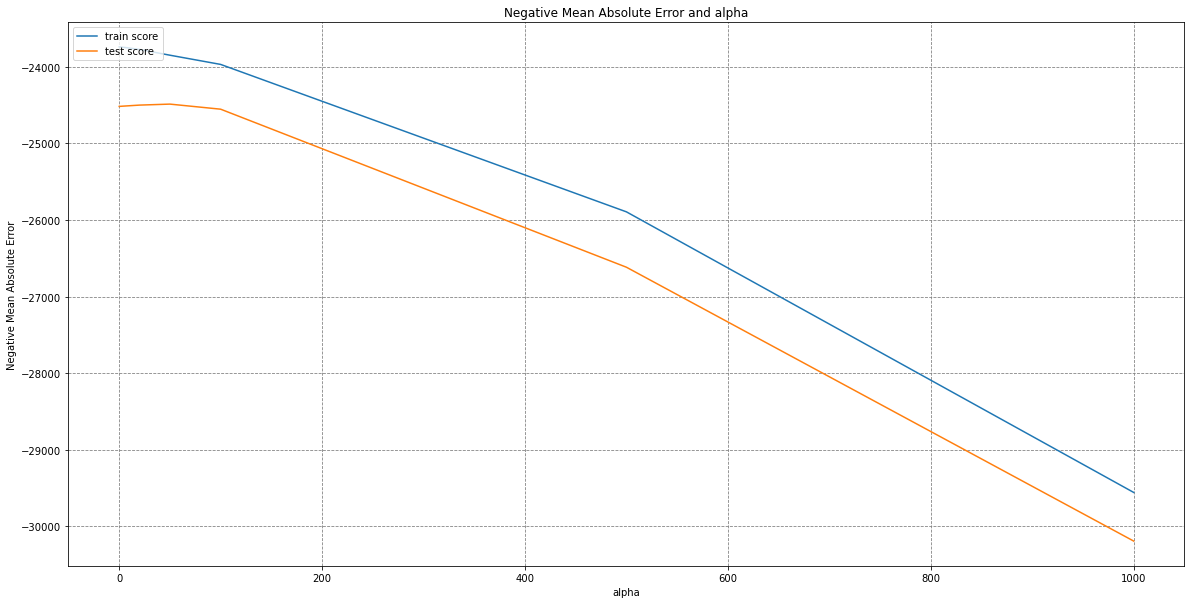

In [6559]:
# plotting mean test and train scoes with alpha 
lasso_model_cv_results['param_alpha'] = lasso_model_cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20,10))
plt.grid(color='gray', linestyle='dashed')
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_train_score'])
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [6560]:
lasso_model_cv.best_estimator_

Lasso(alpha=50)

As per lasso model alpha 50 seems to be the optimum value for alpha.

In [6561]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
lasso.coef_

array([ 262007.61474938,  162809.68672677,  272131.61490046,
        154939.27262764,   54763.65661918, -107633.66867686,
        -86169.49255539,   25234.52851947,  -29049.0910094 ,
             0.        ,   24550.54396938,  100774.17887298,
         46171.27467968,  -33360.30867158,   -4959.5159813 ])

We have received the co-efficients. Now we will be mapping these co-efficients to the corressponding features to create a 
dataframe which can used further. One of the coefficients is 0 which clearly indicates that Lasso has performed feature selection.

In [6562]:
lasso_pred_var = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso.coef_.round(2)})
lasso_pred_var = lasso_pred_var[lasso_pred_var['Coefficient'] != 0.00]
lasso_pred_var.reset_index(drop=True, inplace=True)
lasso_pred_var.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
2,BsmtUnfSF,272131.61
0,BsmtFinSF1,262007.61
1,BsmtFinSF2,162809.69
3,2ndFlrSF,154939.27
10,OverallQual_Very Excellent,100774.18
4,LowQualFinSF,54763.66
11,RoofMatl_Membran,46171.27
7,MSSubClass_2-STORY 1945 & OLDER,25234.53
9,HouseStyle_1.5Unf,24550.54
13,Foundation_Wood,-4959.52


Top features in descenindg order as per Lasso Regression.

In [6563]:
#No of predictors in lasso model
lasso_pred_var.shape[0]

14

### Prediction on Test data

In [6564]:
#Defining custom bar plot function to visualize the influencers
def mybar_plot(pred_var):
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=pred_var,x="Coefficient",y="Features")
    ax.set_ylabel(ylabel ="Coefficient", fontsize=20)
    ax.set_xlabel(xlabel ="Features",fontsize=20)
    plt.grid(color='gray', linestyle='dashed')
    plt.show()

In [6565]:
#Splitting data into X and y
y_test = df_test.pop('SalePrice')
X_test = df_test

In [6566]:
#Scaling test data
#Performing only transfomr using the scaler which was used to fit training data
X_test[house_prices_numeric.columns] = scaler.transform(X_test[house_prices_numeric.columns]) # Only Transform
X_test.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
399,0.379310,0.098257,0.950000,0.150602,0.459536,0.0,0.132013,0.330211,0.323106,0.240924,...,0,0,0,0,1,0,0,0,1,0
1361,0.887931,0.213904,0.916667,0.024096,0.720996,0.0,0.120698,0.476748,0.523490,0.000000,...,0,0,0,0,1,0,0,0,1,0
248,0.439655,0.144210,0.883333,0.152108,0.000000,0.0,0.396040,0.245902,0.192713,0.455446,...,0,0,0,0,1,0,0,0,1,0
974,0.336207,0.145607,0.716667,0.000000,0.000000,0.0,0.343234,0.208431,0.334612,0.485699,...,0,0,0,0,1,0,0,0,1,0
952,0.336207,0.084940,0.883333,0.000000,0.373514,0.0,0.050919,0.221813,0.158198,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [6567]:
#Making sure Same columns are used as we have eliminated some columns manually based on VIF
X_test_rfe = X_test[X_train_rfe.columns]

### Ridge Regression Prediction

In [6568]:
y_test_pred_ridge = ridge.predict(X_test_rfe)
r2_score(y_test, y_test_pred_ridge)

0.7203599851903961

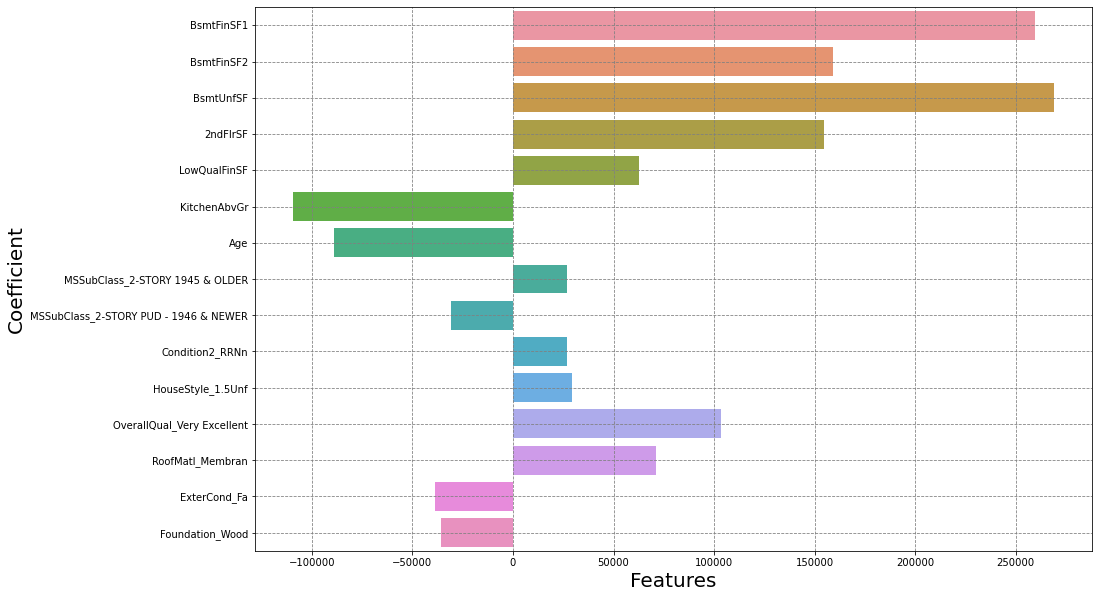

In [6569]:
mybar_plot(ridge_pred_var)

### Lasso Regression  Prediction

In [6570]:
y_test_pred_lasso = lasso.predict(X_test_rfe)
r2_score(y_test, y_test_pred_lasso)

0.7234213740553621

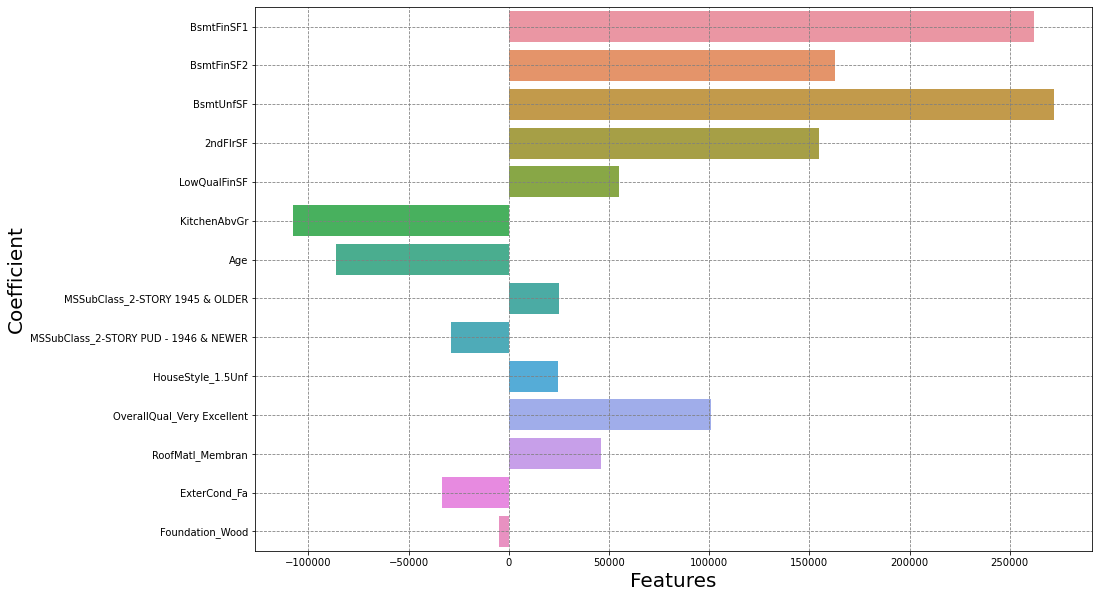

In [6571]:
mybar_plot(lasso_pred_var)

From the above models it can be understood that Some of the strong influencers of SalePrice in this Market are 

1.<b>BsmtUnfSF</b>: Unfinished square feet of basement area - Postive Influencer<br>
2.<b>BsmtFinSF1</b>: Type 1 finished square feet- Postive Influencer<br>
3.<b>BsmtFinSF2</b>: Type 2 finished square feet- Postive Influencer<br>
4.<b>2ndFlrSF</b>: Second floor square feet- Postive Influencer<br>
5.<b>OverallQual_Very Excellent</b> - Rates the overall material and finish of the house- Postive Influencer<br>	
6.<b>KitchenAbvGr</b> - Kitchen: Kitchens above grade - Negative Influencer<br>
7.<b>Age</b> - Age of the house - Negative Influencer<br>
8.<b>ExterCond_Fa</b> - Evaluates the present condition of the material on the exterior - Negative Influencer<br>